In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class counts:
Class
0    284315
1       492
Name: count, dtype: int64


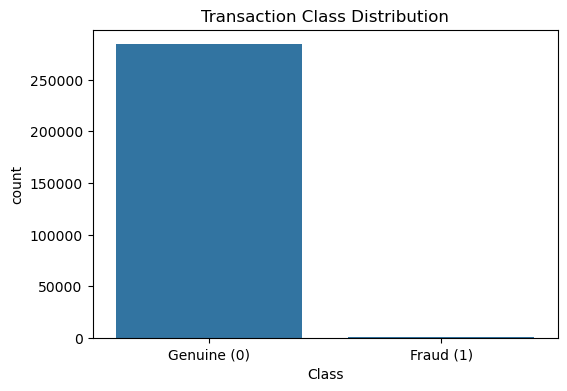

In [3]:
 
print("Missing values per column:")
print(df.isnull().sum())

class_counts = df["Class"].value_counts()
print("\nClass counts:")
print(class_counts)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)
plt.xticks([0,1], ["Genuine (0)", "Fraud (1)"])
plt.title("Transaction Class Distribution")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

 
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

 
X = df.drop('Class', axis=1)
y = df['Class']

 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    stratify=y, 
    random_state=42
)

 
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

 
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE: ", y_train_res.value_counts().to_dict())


Before SMOTE: {0: 227451, 1: 394}
After SMOTE:  {0: 227451, 1: 227451}


Classification Report:

              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962

ROC–AUC: 0.9698



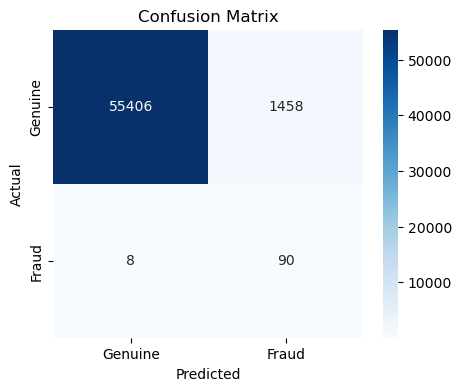

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)

y_pred    = lr.predict(X_test)
y_proba   = lr.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC–AUC: {roc_auc:.4f}\n")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Genuine","Fraud"],
            yticklabels=["Genuine","Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

 
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)


y_pred_rf   = rf.predict(X_test)
y_proba_rf  = rf.predict_proba(X_test)[:, 1]


print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, digits=4))
print("Random Forest ROC–AUC:", roc_auc_score(y_test, y_proba_rf))


Random Forest Classification Report:

              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8454    0.8367    0.8410        98

    accuracy                         0.9995     56962
   macro avg     0.9225    0.9182    0.9204     56962
weighted avg     0.9995    0.9995    0.9995     56962

Random Forest ROC–AUC: 0.9731024901519414


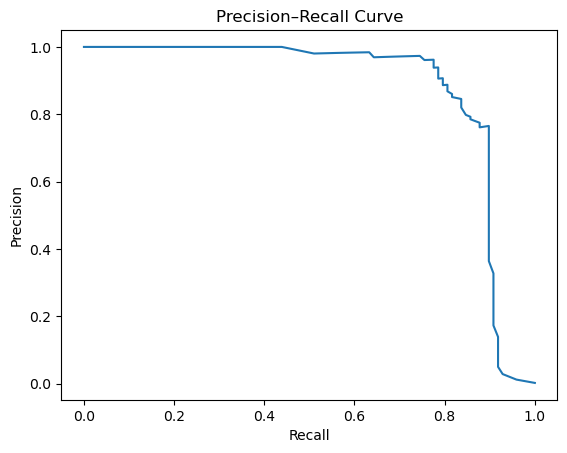

Threshold for 80% precision: 0.44 => Recall: 0.8367346938775511


In [7]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

prec, recall, thresh = precision_recall_curve(y_test, y_proba_rf)
plt.plot(recall, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()

idx = np.argmax(prec >= 0.80)
print("Threshold for 80% precision:", thresh[idx], 
      "=> Recall:", recall[idx])


Classification Report at threshold = 0.44:

              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8200    0.8367    0.8283        98

    accuracy                         0.9994     56962
   macro avg     0.9099    0.9182    0.9140     56962
weighted avg     0.9994    0.9994    0.9994     56962



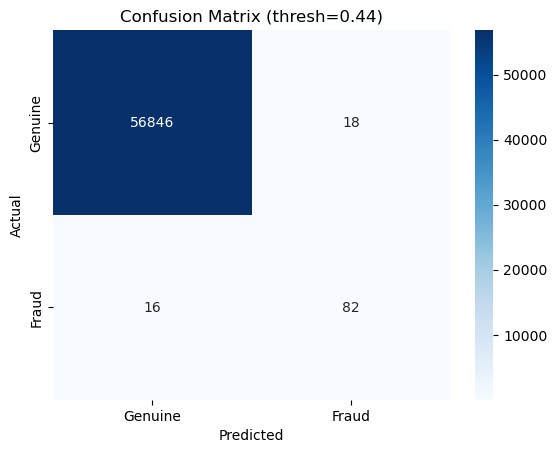

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

 
best_thresh = 0.44
y_pred_thresh = (y_proba_rf >= best_thresh).astype(int)

 
print("Classification Report at threshold = 0.44:\n")
print(classification_report(y_test, y_pred_thresh, digits=4))

 
cm = confusion_matrix(y_test, y_pred_thresh)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Genuine","Fraud"],
            yticklabels=["Genuine","Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (thresh={best_thresh})")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(50, 300),
    "max_depth": randint(5, 30),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10)
}

rs = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="recall",
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train_res, y_train_res)
best_rf = rs.best_estimator_

print("Best RF params:", rs.best_params_)

for thresh in [0.5, 0.44]:
    y_proba = best_rf.predict_proba(X_test)[:,1]
    y_pred  = (y_proba >= thresh).astype(int)
    print(f"\nMetrics at thresh={thresh}:")
    print(classification_report(y_test, y_pred, digits=4))
    print("ROC–AUC:", roc_auc_score(y_test, y_proba))
